# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
! pip install citipy
! pip install requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import json
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for Holding lat_lngs & Cities
lat_lngs = []
cities = []

# Create a Set of Random lat & lng Combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify Nearest City for Each lat, lng Combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)

# Print the City Count to Confirm Sufficient Count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=4))

{
    "coord": {
        "lon": 47.0281,
        "lat": 47.2456
    },
    "weather": [
        {
            "id": 600,
            "main": "Snow",
            "description": "light snow",
            "icon": "13n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 14,
        "feels_like": 7.47,
        "temp_min": 14,
        "temp_max": 14,
        "pressure": 1030,
        "humidity": 73
    },
    "visibility": 584,
    "wind": {
        "speed": 1.01,
        "deg": 90,
        "gust": 1.99
    },
    "snow": {
        "1h": 0.19
    },
    "clouds": {
        "all": 100
    },
    "dt": 1613510105,
    "sys": {
        "type": 3,
        "id": 2002036,
        "country": "RU",
        "sunrise": 1613534033,
        "sunset": 1613571492
    },
    "timezone": 14400,
    "id": 467479,
    "name": "Yenotayevka",
    "cod": 200
}


In [4]:
print(requests.get(query_url + city))

<Response [200]>


In [5]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Garoowe
Processing Record 2 | Grand Gaube
Processing Record 3 | Weiser
City not found. Skipping...
Processing Record 4 | Kathmandu
Processing Record 5 | Puerto Ayora
Processing Record 6 | Barbacena
Processing Record 7 | Caicedo
Processing Record 8 | Kadyy
Processing Record 9 | Pangnirtung
Processing Record 10 | Bethel
Processing Record 11 | Upernavik
City not found. Skipping...
Processing Record 12 | Jamestown
Processing Record 13 | Rikitea
Processing Record 14 | Atuona
Processing Record 15 | Eidfjord
Processing Record 16 | Kapaa
Processing Record 17 | Half Moon Bay
Processing Record 18 | Durban
Processing Record 19 | Saint Paul Harbor
Processing Record 20 | Butaritari
Processing Record 21 | Chokurdakh
Processing Record 22 | Busselton
Processing Record 23 | Sarankhola
Processing Record 24 | Saint-Augustin
Processing Record 25 | Airai
Processing Record 26 | Punta Arenas
Processing Record 27 | Hithadhoo
City n

Processing Record 228 | Capinota
Processing Record 229 | Chivilcoy
Processing Record 230 | Bathsheba
Processing Record 231 | Faanui
Processing Record 232 | San-Pédro
Processing Record 233 | Zhoucheng
Processing Record 234 | Longyearbyen
Processing Record 235 | Geraldton
Processing Record 236 | Garden City
Processing Record 237 | Tasiilaq
Processing Record 238 | Mgandu
Processing Record 239 | Worland
Processing Record 240 | Deputatsky
Processing Record 241 | Quilmaná
Processing Record 242 | Torres
Processing Record 243 | Nanortalik
Processing Record 244 | Dolinsk
Processing Record 245 | Cairns
Processing Record 246 | Bani Walid
Processing Record 247 | Saldanha
Processing Record 248 | Esil
Processing Record 249 | Khatanga
Processing Record 250 | Pestretsy
Processing Record 251 | Clyde River
Processing Record 252 | Lashio
Processing Record 253 | Kalāleh
Processing Record 254 | Hualmay
City not found. Skipping...
Processing Record 255 | Northam
Processing Record 256 | Souillac
Processing R

Processing Record 458 | Kruisfontein
Processing Record 459 | Jaisinghnagar
Processing Record 460 | Jensen Beach
Processing Record 461 | Fairbanks
Processing Record 462 | Brae
Processing Record 463 | Kaeo
Processing Record 464 | Batemans Bay
Processing Record 465 | Juneau
Processing Record 466 | Chāndbāli
Processing Record 467 | Leningradskiy
Processing Record 468 | Dawson Creek
Processing Record 469 | Ust-Kuyga
Processing Record 470 | Chernyshevskiy
Processing Record 471 | Saint George
Processing Record 472 | Ongandjera
Processing Record 473 | Banyo
Processing Record 474 | Dingle
Processing Record 475 | Touros
Processing Record 476 | Horodnya
Processing Record 477 | Oxford
City not found. Skipping...
Processing Record 478 | Gander
Processing Record 479 | High Rock
Processing Record 480 | Laguna
Processing Record 481 | Piła
Processing Record 482 | Bitung
Processing Record 483 | Cerano
Processing Record 484 | Selikhino
Processing Record 485 | Ashington
Processing Record 486 | Staraya Rus

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               582
Country            582
Date               582
Latitude           582
Longitude          582
Max Temperature    582
Humidity           582
Cloudiness         582
Wind Speed         582
dtype: int64

In [7]:
# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Garoowe,SO,1613509928,8.4054,48.4845,66.34,91,10,10.69
1,Grand Gaube,MU,1613509752,-20.0064,57.6608,77.00,88,96,1.99
2,Weiser,US,1613510106,44.2510,-116.9693,42.80,52,40,4.61
3,Kathmandu,NP,1613509847,27.7167,85.3167,48.20,93,20,3.44
4,Puerto Ayora,EC,1613509704,-0.7393,-90.3518,84.20,70,75,12.66


In [8]:
# Export & Save Data Into a .csv.
weather_data.to_csv("weather_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

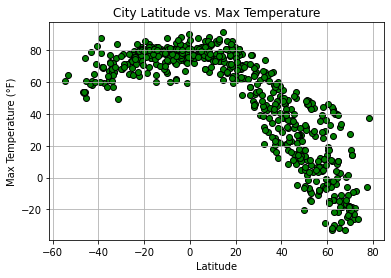

In [9]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="green", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)


# Show Plot
plt.show()


## Latitude vs. Humidity Plot

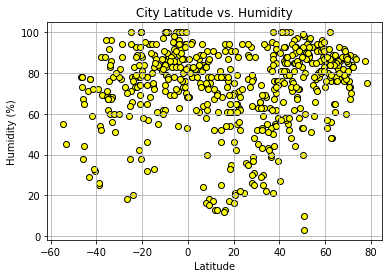

In [10]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="yellow", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Show Plot
plt.show()


## Latitude vs. Cloudiness Plot

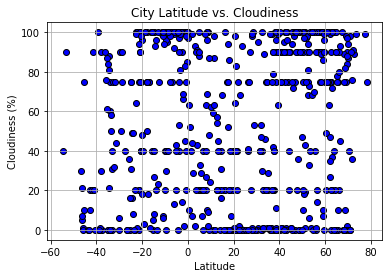

In [11]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show Plot
plt.show()

## Latitude vs. Wind Speed Plot

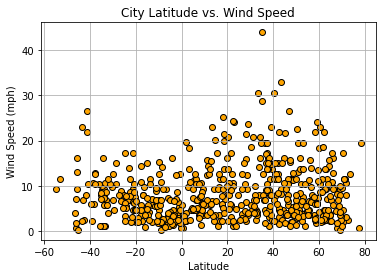

In [12]:
#scatter plot for each Data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="orange", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Show Plot
plt.show()
